### Guided Practices

Code to run during class sessions. This is included in the readme as well.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
import math
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

def return_jitter():
    return 5*np.random.random_sample(size=100)

Random = pd.DataFrame({'x':return_jitter(),'y':return_jitter()})

df['x'] = df.x + Random.x
df['y'] = df.y + Random.y

biased_df['x'] = biased_df.x + Random.x
biased_df['y'] = biased_df.y + Random.y

## fit
lm1 = linear_model.LinearRegression().fit(df[['x']], df['y'])
print(metrics.mean_squared_error(df['y'], lm1.predict(df[['x']])))

## biased fit
lm2 = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print(metrics.mean_squared_error(df['y'], lm2.predict(df[['x']])))

biased_df['predicted_y'] = lm2.predict(df[['x']])
df['predicted_y'] = lm1.predict(df[['x']])

3.97833183756
3.97844510894


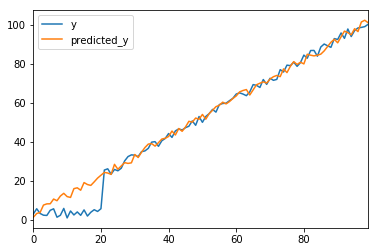

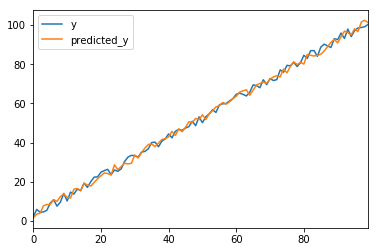

In [2]:
biased_df[['y','predicted_y']].plot()
df[['y','predicted_y']].plot()

In [3]:
weather
bikeshare[['temp', 'hum']]
bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])

NameError: name 'weather' is not defined

In [ ]:
from sklearn import cross_validation
wd = '../../assets/dataset/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))

print(np.mean(scores))

# this score will be lower, but we're trading off bias error for generalized error
lm = linear_model.LinearRegression().fit(modeldata, y)
print(metrics.mean_squared_error(y, lm.predict(modeldata)))

In [ ]:
train_index

In [ ]:
test_index

In [ ]:
k = range(2, 51, 2)
final_scores = []
for i in k:
    kf = cross_validation.KFold(len(modeldata), n_folds=i)
    scores = []
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
        scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    final_scores.append(np.mean(scores))
    print(np.mean(scores))
    


In [ ]:
df_plot = pd.DataFrame({'k':k,'final_scores':final_scores})
df_plot.plot()
#len(final_scores)

In [ ]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print(metrics.mean_squared_error(y, lm.predict(modeldata)))
lm = linear_model.Lasso().fit(modeldata, y)
print(metrics.mean_squared_error(y, lm.predict(modeldata)))
lm = linear_model.Ridge().fit(modeldata, y)
print(metrics.mean_squared_error(y, lm.predict(modeldata)))

In [ ]:
alphas = np.logspace(-10, 10, 21)
print(alphas)
results=[]
for a in alphas:
    print(format(a,'.65f'))
for a in alphas:
    print('Alpha:', a)
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print(lm.coef_)
    print(metrics.mean_squared_error(y, lm.predict(modeldata)))
    results.append(metrics.mean_squared_error(y, lm.predict(modeldata)))

In [ ]:
plt.scatter(x=alphas,y=results)
plt.xlim(10**(-10),10**10)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Alpha vs MSE')

In [ ]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
inter = [True,False]
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas,'fit_intercept':inter},
    scoring='neg_mean_squared_error') #mean_squared_error

gs.fit(modeldata, y)

print(gs.best_score_) # mean squared error here comes in negative, so let's make it positive.
print(gs.best_estimator_) # explains which grid_search setup worked best
print(gs.grid_scores_) # shows all the grid pairings and their performances.

In [ ]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error', cv=10)#mean_squared_error

gs.fit(modeldata, y)

print(-gs.best_score_) # mean squared error here comes in negative, so let's make it positive.
print(gs.best_estimator_) # explains which grid_search setup worked best
print(gs.grid_scores_) # shows all the grid pairings and their performances.

In [ ]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print(distance, 'is better than', current_distance)
            current_distance = distance
            start = n
    if got_better:
        print('found better solution! using', current_distance)
        a += 1
    else:
        optimized = True
        print(start, 'is closest to', num_to_approach)


For the DP example below, it might be a great idea for students to take the code and implement a stopping point, similar to what n_iter would do in gradient descent.

There can be a great conversation about stopping early and still _kinda_ getting the right result vs taking a longer time to solve and having a more precise model.

That solution is below.

In [ ]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
n_iter = 0
while not optimized:
    if n_iter > 3:
        print('stopping iterations')
        break
    n_iter += 1
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print('found better solution! using', current_distance)
        a += 1
    else:
        optimized = True


In [ ]:
lm = linear_model.SGDRegressor()
lm.fit(modeldata, y)
print(lm.score(modeldata, y))
print(metrics.mean_squared_error(y, lm.predict(modeldata)))

### Independent Practice Solution

This code shows the variety of challenges and some student gotchas. The plots will help showcase what should be learned.

1. With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
2. We know when to properly use l1 vs l2 regularization based on the data. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true?
    * (if it didn't look like it, did gradient descent have enough iterations?)
3. How do results change when you alter the learning rate (power_t)?

In [ ]:
%matplotlib inline

In [ ]:
alphas = np.logspace(-10, -1, 10)
print(alphas)
params = {'alpha':alphas, } # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
#print(grid)
#grid[[0]] = grid.apply(lambda x: x['alpha'])
#grid[[1]] = grid.apply(lambda x: -x)
#
#grid['parameters']
grid['mean_validation_score'] = grid['mean_validation_score'].apply(lambda x: -x)
grid.columns = ['alpha', 'mean_squared_error', 'cv']
grid

With the alphas available, it looks like at mean squared error stays generally flat with incredibly small alpha values, but starting at $10^{-3}$, the error begins to elbow. We probably don't have much of a different in performance with other alpha values. 

In [ ]:
grid.plot('alpha', 'mean_squared_error', logx=True)

At alpha values of either .1 or 1, the l1_ratio works best closer to 1! Interesting. At other values of alpha they should see similar results, though the graphs aren't as clear.

In [ ]:
l1_2_ratios = [float(i) / 100 for i in range(0, 101, 5)]
print(l1_2_ratios)
params = {'l1_ratio':l1_2_ratios, 'penalty': ['elasticnet'], 'alpha': [.1], 'n_iter': [50]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid['mean_validation_score'] = grid['mean_validation_score'].apply(lambda x: -x)
grid.columns = ['l1_ratio', 'neg_mean_squared_error', 'cv']
grid


In [ ]:
gs.best_estimator_

In [ ]:
grid.plot('l1_ratio', 'neg_mean_squared_error',rot=30)

In [ ]:
learning = list(range(1,50))
print(learning)
params = {'eta0':list(range(1,50)), 'n_iter': [50]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid.columns = ['eta0', 'neg_mean_squared_error', 'cv']
grid['neg_mean_squared_error'] = grid['neg_mean_squared_error'].apply(lambda x: -x)
grid

Here it should be apparent that as the initial learning rate increases, the error should _also_ increase. And what happens when the initial learning rate is too high? A dramatic increase in error. Students should recognize the importance of learning rate and what values it should be set at, the smaller generally the better.

In [ ]:
grid.plot('eta0', 'neg_mean_squared_error', logy=True)